# Imports sous Notebook Python
Dans ce TP, vous allez essentiellement programmer des classes dans un fichier que vous pourrez garder pour plus tard. Ces classes seront enregistrées dans des fichiers `Optim.py`  et `functions.py`. Cependant, le comportement par défaut d'un Notebook quand on demande d'importer un fichier est de ne pas le relire !!! Ainsi vos modifications dans les fichiers ne seront pas prises en compte. Pour que ce soit le cas, il faut lancer les commandes suivantes :

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Fonctionnement des classes et des fichiers de librairie sous python
Dans cette section, nous allons nous chauffer un peu et apprendre (si on ne le sait pas déjà) comment fonctionnent les classes et les fichiers sous python. Dans le fichier `functions.py` contient déjà une classe nommée `square`. Ouvrez le fichier `function.py`. Cette classe `square` a 4 sous-fonctions, la fonction `__init__` se lance à l'appel de la classe (instanciation) et les autres fonctions se lancent avec les commandes suivantes

In [2]:
import functions as  func
print("***** INSTANCIATION")
J=func.square()
print("***** METHODES DE LA CLASSE")
a=np.array([1,2])
print(J.value(a))
print(J.grad(a))
print(J.Hess(a))

***** INSTANCIATION
***** METHODES DE LA CLASSE
14.5
[ 1 14]
[[1. 0.]
 [0. 7.]]


# Implémentation de nouvelles fonctions


> **TODO** : Dans le fichier `functions.py`, créez une classe nommée `Rosen()` sur le modèle de `square()` qui calcule la fonction, le gradient ou la Hessienne de :
$$ f:(x,y)\mapsto 100*(y-x^2)^2 +(1-x)^2$$
Créez aussi une classe `oscill()` qui calcule la fonction, le gradient ou la Hessienne de :
$$ g:(x,y)\mapsto \frac 1 2 x^2 +x\cos(y)$$


In [3]:
import functions as func

R=func.Rosen()
O=func.oscill()
a=np.array([1.3,2.45])
print(R.value(a)) # 57.85
print(O.value(a)) # -0.15630063026149965
print(R.grad(a))
print(R.Hess(a))
print(O.grad(a))
print(O.Hess(a))


57.85
-0.15630063026149965
[-394.6  152. ]
[[1050. -520.]
 [-520.  200.]]
[ 0.52976875 -0.82909411]
[[ 1.         -0.6377647 ]
 [-0.6377647   1.00130063]]


# Tests de dérivées numériques
Volontairement, je ne vous ai pas donné les réponses pour le gradient et la Hessienne. Avant de continuer, il faut vérifier que vos calculs sont bons. Pour cela on va faire des tests avec le gradient et la dérivée numérique. Pour ce faire on va partir d'un point $a$ quelconque et on prend une direction $d$ aléatoire. On compare ensuite pour plusieurs valeurs de $\varepsilon$  les valeurs suivantes :
$$\frac{J(a+\varepsilon d) -J(a)}{\varepsilon} \simeq (\nabla J(a),d)$$
$$\frac{\nabla J(a+\varepsilon d) -\nabla J(a))}{\varepsilon} \simeq HJ(a)d$$
On rappelle que quand on compare deux nombres $b$ et $c$, on s'intéresse au nombre $b/c$. Quand on compare deux vecteurs $b$ et $c$, on s'intéresse au ratio des normes et à l'angle donné par 
$$\frac{(b,c)}{\Vert b \Vert \Vert c\Vert}$$
On vous donne une fonction `deriv_num(J,a,d,compute_grad=True,compute_Hess=True)` dans `Optim.py` qui teste la dérivée numérique d'une fonction `J`. Les arguments `compute_grad` et `compute_Hess` sont optionnels et déterminent si on doit vérifier le calcul de `J` pour son gradient et sa Hessienne. Ensuite testez votre code pour les 3 fonctions.

In [5]:
import Optim as opt
np.random.seed(42)
a=np.random.randn(2)
d=np.random.randn(2)
opt.deriv_num(func.square(),a,d)
opt.deriv_num(func.Rosen(),a,d)
opt.deriv_num(func.oscill(),a,d)

eps 1.0e-01 grad 7.2e-01 ratio 0.0e+00 angle 0.0e+00
eps 1.0e-02 grad 7.2e-02 ratio 2.2e-16 angle 0.0e+00
eps 1.0e-03 grad 7.2e-03 ratio 1.5e-14 angle 1.1e-16
eps 1.0e-04 grad 7.2e-04 ratio 1.4e-13 angle 0.0e+00
eps 1.0e-05 grad 7.2e-05 ratio 5.9e-14 angle 0.0e+00
eps 1.0e-06 grad 7.2e-06 ratio 1.2e-12 angle 0.0e+00
eps 1.0e-07 grad 7.2e-07 ratio 7.3e-11 angle 1.1e-16
eps 1.0e-08 grad 7.0e-08 ratio 8.9e-10 angle 1.1e-16
eps 1.0e-09 grad 1.9e-09 ratio 1.3e-08 angle 0.0e+00
eps 1.0e-10 grad 4.6e-08 ratio 3.8e-08 angle 0.0e+00
eps 1.0e-11 grad 1.6e-06 ratio 3.6e-07 angle 3.2e-15
eps 1.0e-12 grad 6.5e-06 ratio 3.9e-06 angle 7.5e-13
eps 1.0e-01 grad 1.5e-01 ratio 1.0e-02 angle 3.4e-03
eps 1.0e-02 grad 1.6e-02 ratio 1.1e-03 angle 3.7e-05
eps 1.0e-03 grad 1.6e-03 ratio 1.1e-04 angle 3.8e-07
eps 1.0e-04 grad 1.6e-04 ratio 1.1e-05 angle 3.8e-09
eps 1.0e-05 grad 1.6e-05 ratio 1.1e-06 angle 3.8e-11
eps 1.0e-06 grad 1.6e-06 ratio 1.1e-07 angle 3.8e-13
eps 1.0e-07 grad 1.6e-07 ratio 1.1e-08 angle 3

## Algorithme d'optimisation
Dans `Optim.py`, on vous donne une fonction `main_algorithm(function,step,xini,dc,ls,itermax,tol,verbose)` qui lance un algorithme d'optimisation. Les différentes variables sont expliquées dans le bloc de commentaire, nous nous concentrons dans ce paragaphe sur les variables les plus compliquées à comprendre, ce sont les variables  `dc` et `ls`, ce sont deux fonctions. La fonction `ls(x, function, step, descent,f,df)` calcul le pas dans la direction de descent donnée par `descent`. Certaines méthodes on besoin de la valeur de la fonction ou de son gradient au point `x`, ces variables sont stockées dans `f` et `df`. La fonction en elle-même est le stockée dans `function`. Pour des raisons qui seront plus claires plus tard, la fonction `ls` rend `x2,f2,df2,step2` où `step2` est le pas choisi par la méthode, `x2,f2,df2` sont, respectivement, les nouvelles valeurs de `x`, de `f` et de `df`. Une exemple de fonction codant l'algorithme de calcul de pas fixe est donné dans `ls_constant`.

La fonction `dc(x,function,df)` calcule la direction de descente. L'algorithme de gradient est donné ci-dessous.

Ensuite on donne un exemple d'optimisation de méthode de gradient à pas fixe

In [6]:
def ls_constant(x, function, step, descent,f,df) :
    ## FIXED STEP
    step2=step
    x2=x+step2*descent
    f2=function.value(x2)
    df2=function.grad(x2)
    return x2,f2,df2,step2

def dc_gradient(x,function,df) :
    descent=-df
    return descent
    
x0=np.array([7,1.5])
f=func.square()
res=opt.main_algorithm(f,0.1,x0,ls=ls_constant,dc=dc_gradient)

iter=   0 f=3.238e+01 df=1.262e+01 comp=[   1,   1,   0]
iter=   1 f=2.055e+01 df=7.044e+00 comp=[   2,   2,   0]
iter=   2 f=1.614e+01 df=5.748e+00 comp=[   3,   3,   0]
iter=   3 f=1.303e+01 df=5.111e+00 comp=[   4,   4,   0]
iter=   4 f=1.055e+01 df=4.593e+00 comp=[   5,   5,   0]
iter=   5 f=8.543e+00 df=4.134e+00 comp=[   6,   6,   0]
iter=   6 f=6.920e+00 df=3.720e+00 comp=[   7,   7,   0]
iter=   7 f=5.605e+00 df=3.348e+00 comp=[   8,   8,   0]
iter=   8 f=4.540e+00 df=3.013e+00 comp=[   9,   9,   0]
iter=   9 f=3.677e+00 df=2.712e+00 comp=[  10,  10,   0]
iter=  10 f=2.979e+00 df=2.441e+00 comp=[  11,  11,   0]
iter=  11 f=2.413e+00 df=2.197e+00 comp=[  12,  12,   0]
iter=  12 f=1.954e+00 df=1.977e+00 comp=[  13,  13,   0]
iter=  13 f=1.583e+00 df=1.779e+00 comp=[  14,  14,   0]
iter=  14 f=1.282e+00 df=1.601e+00 comp=[  15,  15,   0]
iter=  15 f=1.039e+00 df=1.441e+00 comp=[  16,  16,   0]
iter=  16 f=8.413e-01 df=1.297e+00 comp=[  17,  17,   0]
iter=  17 f=6.814e-01 df=1.167e

On vous donne aussi une fonction `graphical_info` qui permet de donner des informations sur le tableau `res` de convergence

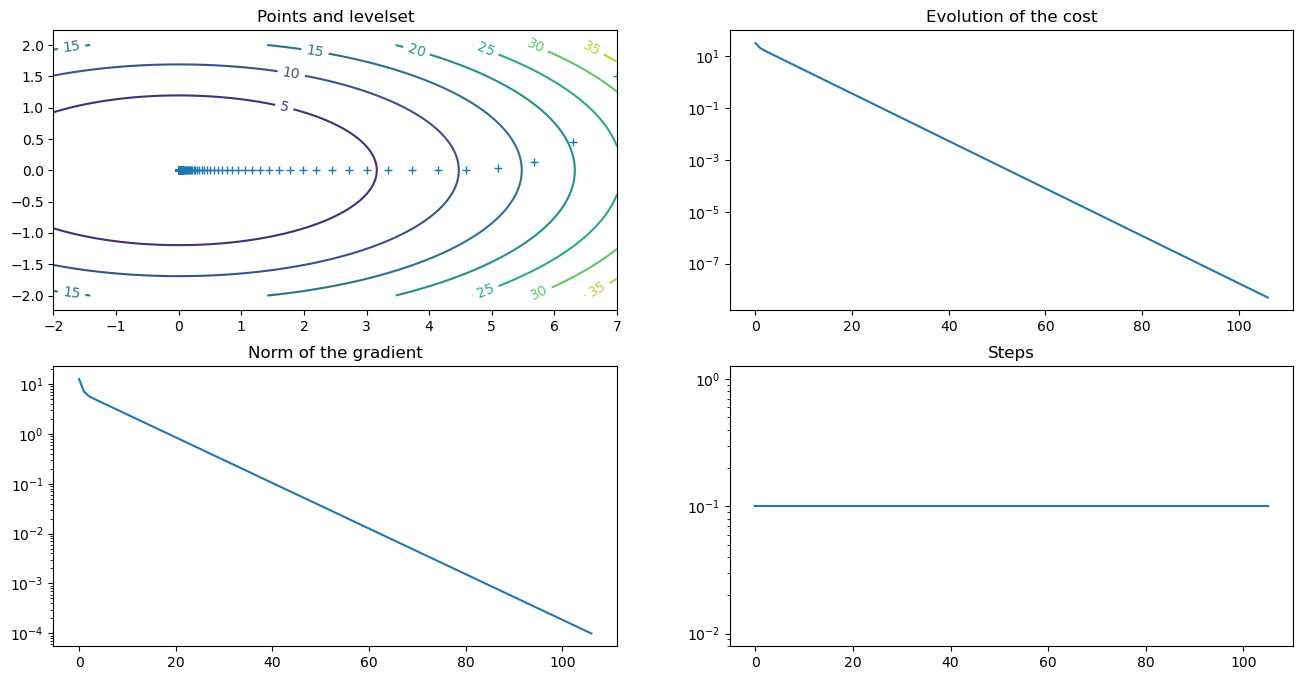

In [7]:

#TEST 1 : fonctionnne très bien
x0,f=np.array([7,1.5]),func.square()
res=opt.main_algorithm(f,0.1,x0,ls=ls_constant,dc=dc_gradient,verbose=False)
opt.graphical_info(res,f,xmax=7)


>**TODO** :Essayer les 3 fonctions avec plusieurs pas et affichez le nombre d'itérations nécessaires et la valeur finale de la fonction obtenue et la valeur finale du gradient, vous devez faire apparaître le fait qu'un pas trop petit ou trop grand ne fait pas converger. Vous pouvez vous aider du code qui est déjà fait pour la fonction `square` et remplir uniquement les `TODO` par des listes de pas adéquates.

In [8]:
x0=np.array([-1,1])
f=func.square()
for s in [0.325,0.25,0.125,0.05,1e-3,1e-4] :
    res=opt.main_algorithm(f,s,x0,ls=ls_constant,dc=dc_gradient,verbose=False)
    print("step : {:1.2e} iter : {:3d} cost :{:1.3e} grad :{:1.3e}".format(s,len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1]))
print("-----")
x0=np.array([-1,1])
f=func.oscill()
for s in [0.0325,0.025,0.0125,0.005,1e-4,1e-5]:
    res=opt.main_algorithm(f,s,x0,ls=ls_constant,dc=dc_gradient,verbose=False)
    print("step : {:1.2e} iter : {:3d} cost :{:1.3e} grad :{:1.3e}".format(s,len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1]))
print("-----")
f=func.Rosen()
x0=np.array([-1.,1])
for s in  [0.0325,0.025,0.0125,0.0005,1e-3,1e-4] :
    res=opt.main_algorithm(f,s,x0,ls=ls_constant,dc=dc_gradient,verbose=False,itermax=30000)
    print("step : {:1.2e} iter : {:3d} cost :{:1.3e} grad :{:1.3e}".format(s,len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1]))
    

/home/paul-rohel/Bureau/TP OPTMI SC/.pixi/envs/default/lib/python3.14/site-packages/numpy/linalg/_linalg.py:2792: RuntimeWarning: overflow encountered in dot
  sqnorm = x.dot(x)
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:13: RuntimeWarning: overflow encountered in scalar multiply
  return 0.5*x[0]**2+7/2.*x[1]**2
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:13: RuntimeWarning: overflow encountered in scalar power
  return 0.5*x[0]**2+7/2.*x[1]**2
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:17: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([x[0],7*x[1]])
/tmp/ipykernel_4151/2981709185.py:4: RuntimeWarning: invalid value encountered in add
  x2=x+step2*descent


step : 3.25e-01 iter : 2917 cost :nan grad :nan
step : 2.50e-01 iter :  40 cost :7.192e-10 grad :9.481e-05
step : 1.25e-01 iter :  70 cost :4.967e-09 grad :9.967e-05
step : 5.00e-02 iter : 181 cost :4.780e-09 grad :9.778e-05
step : 1.00e-03 iter : 9207 cost :4.997e-09 grad :9.997e-05
step : 1.00e-04 iter : 20001 cost :9.156e-03 grad :1.353e-01
-----
step : 3.25e-02 iter : 295 cost :-5.000e-01 grad :9.892e-05
step : 2.50e-02 iter : 385 cost :-5.000e-01 grad :9.760e-05
step : 1.25e-02 iter : 772 cost :-5.000e-01 grad :9.912e-05
step : 5.00e-03 iter : 1934 cost :-5.000e-01 grad :9.953e-05
step : 1.00e-04 iter : 20001 cost :-4.822e-01 grad :1.763e-01
step : 1.00e-05 iter : 20001 cost :-1.838e-01 grad :7.451e-01
-----
step : 3.25e-02 iter :   8 cost :inf grad :nan
step : 2.50e-02 iter :   8 cost :inf grad :nan
step : 1.25e-02 iter :   9 cost :inf grad :nan
step : 5.00e-04 iter : 30001 cost :1.023e-06 grad :9.046e-04


/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:35: RuntimeWarning: overflow encountered in scalar power
  return 100*(x[1]-x[0]**2)**2 + (1 - x[0])**2
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:38: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([-400*x[0]*x[1] + 400*x[0]**3 -2 + 2*x[0], 200*x[1]-200*x[0]**2])
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:38: RuntimeWarning: overflow encountered in scalar power
  return np.array([-400*x[0]*x[1] + 400*x[0]**3 -2 + 2*x[0], 200*x[1]-200*x[0]**2])
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:38: RuntimeWarning: invalid value encountered in scalar add
  return np.array([-400*x[0]*x[1] + 400*x[0]**3 -2 + 2*x[0], 200*x[1]-200*x[0]**2])


step : 1.00e-03 iter : 20508 cost :1.251e-08 grad :9.997e-05
step : 1.00e-04 iter : 30001 cost :2.385e-02 grad :1.571e-01


Vous pouvez garder ici trois tests convergents. Remplacez `TODO` par ce qu'il faut

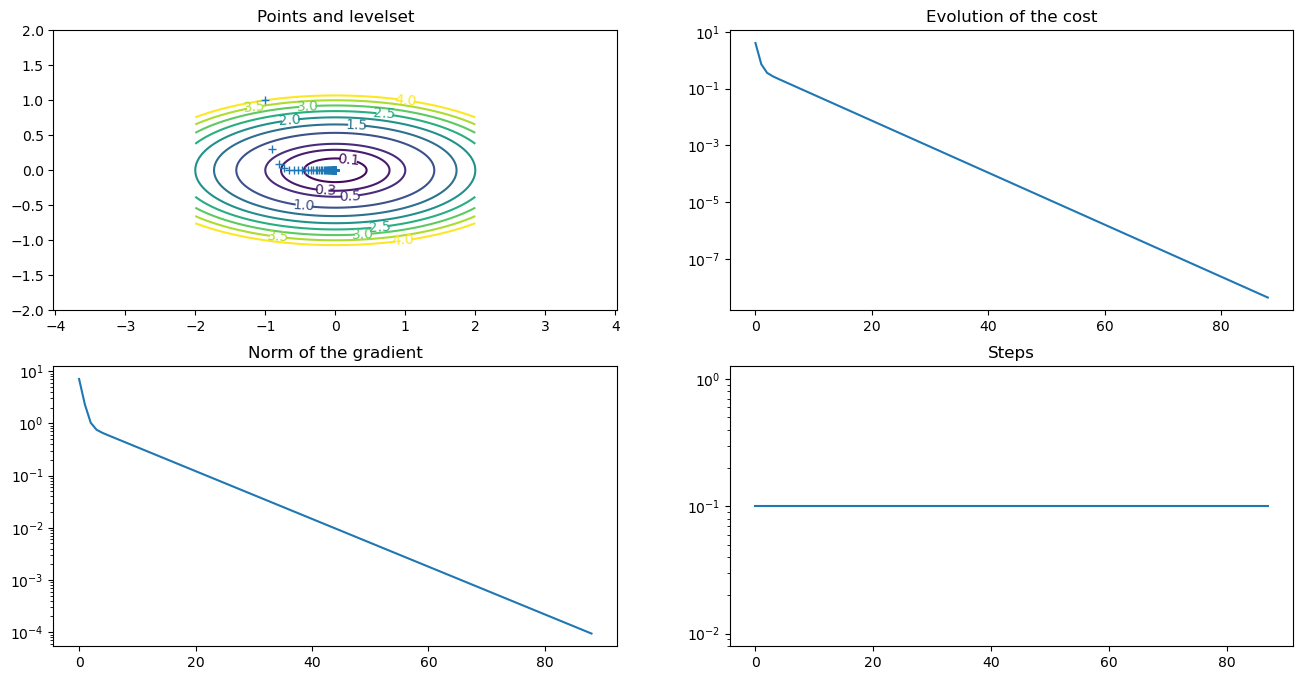

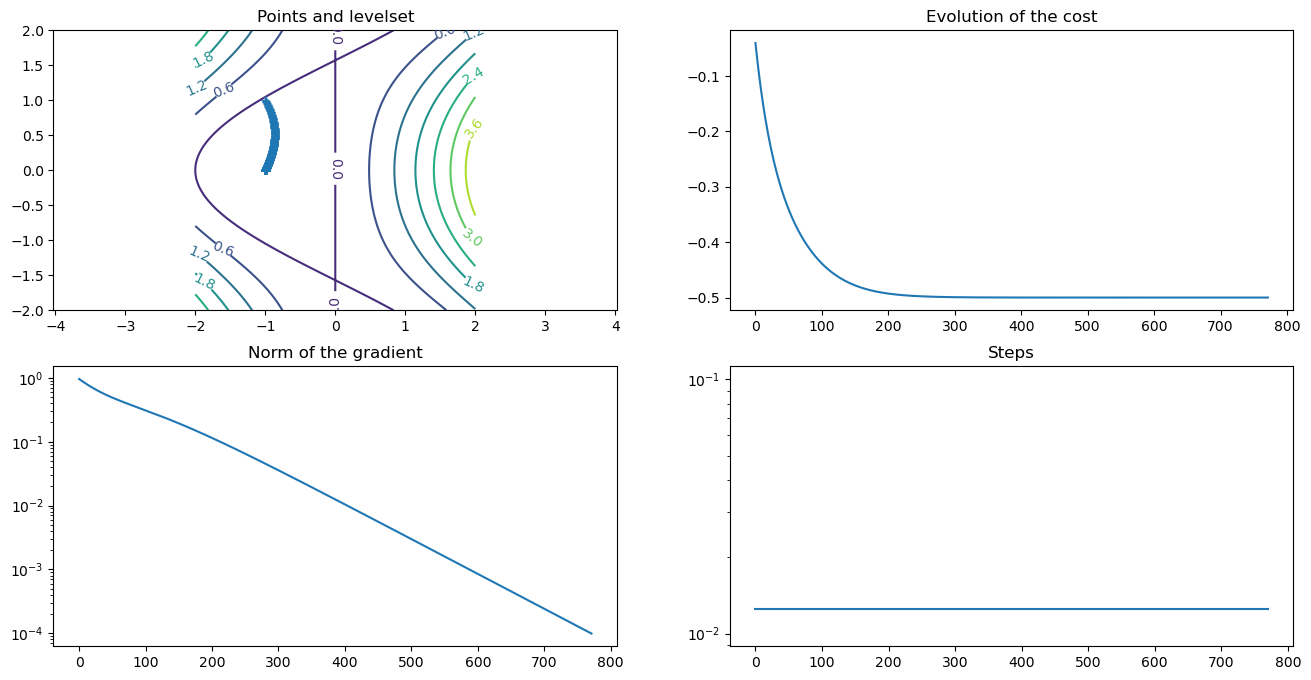

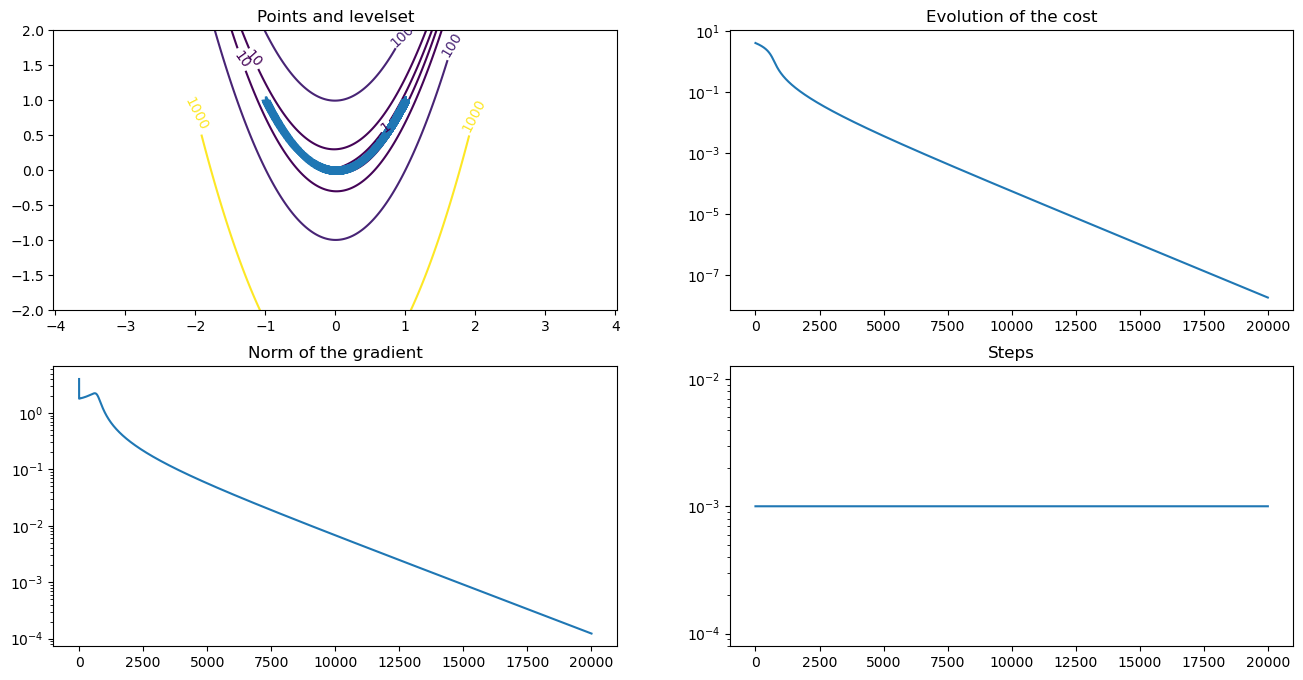

In [10]:
## TEST 1 convergent test for the function 'square': 
f=func.square()
x0=np.array([-1,1])
res=opt.main_algorithm(f,0.1,x0,ls=ls_constant,dc=dc_gradient,verbose=False)
opt.graphical_info(res,f,[0,0.1,0.3,0.5,1,1.5,2,2.5,3,3.5,4])

## TEST 2 convergent test for the function 'Oscill': 
f=func.oscill()
x0=np.array([-1,1])
TODO=0.0125
res=opt.main_algorithm(f,TODO,x0,ls=ls_constant,dc=dc_gradient,verbose=False)
opt.graphical_info(res,f)

## TEST 3 convergent test for the function 'Rosen': 
f=func.Rosen()
TODO=1e-3
x0=np.array([-1,1])
res=opt.main_algorithm(f,TODO,x0,ls=ls_constant,dc=dc_gradient,verbose=False)
opt.graphical_info(res,f,[0,1,10,100,1000])

## Line search Backtracking
Implémenter une fonction de recherche linéaire `ls_backtracking` qui calcule un pas par rebroussement, c'est à dire qui vérifie que la fonction décroît et qui divise le pas par 2 si elle ne décroît pas.
La fonction doit s'écrire sous la forme

`x2,f2,df2,step2 = ls_backtracking(x, function, step, descent,f,df)`

Les arguments en entrée sont 
- `x` : l'itéré actuel
- `function` : qui est la fonction que l'on minimise
- `step` : qui est le pas initial de la line-search
- `descent` : la direction de descente
- `f` : la valeur de la fonction au point `x`
- `df` : la valeur du gradient de la fonction au point `x`

Les arguments en sortie sont 
- `x2` : le nouvel itéré, il vaut `x+step2*descent`
- `f2` : la valeur de la fonction au point `x2`
- `df2` : la valeur du gradient de la fonction au point `x2`
- `step2` : le pas calculé par la méthode

Tester l’algorithme de descente de gradient avec cette recherche linéaire et observer que cette recherche linéaire est plus stable que la précédente. 
Vérifier que pour `step=1` la méthode avec `ls_constant` **diverge** pour la fonction `Rosen` mais elle **converge** avec `ls_backtracking`. Montrez que le coût supplémentaire de cette méthode est négligeable.

In [12]:
def ls_backtracking(x,function,step,descent,f,df) :
    step2=step
    while function.value(x+step2*descent)>= f:
        step2=step2/2
    x2=x+step2*descent
    f2=function.value(x2)
    df2=function.grad(x2)
    return x2,f2,df2,step2

/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:35: RuntimeWarning: overflow encountered in scalar power
  return 100*(x[1]-x[0]**2)**2 + (1 - x[0])**2
/home/paul-rohel/Bureau/TP OPTMI SC/.pixi/envs/default/lib/python3.14/site-packages/numpy/linalg/_linalg.py:2792: RuntimeWarning: overflow encountered in dot
  sqnorm = x.dot(x)
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:38: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([-400*x[0]*x[1] + 400*x[0]**3 -2 + 2*x[0], 200*x[1]-200*x[0]**2])
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:38: RuntimeWarning: overflow encountered in scalar power
  return np.array([-400*x[0]*x[1] + 400*x[0]**3 -2 + 2*x[0], 200*x[1]-200*x[0]**2])
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:38: RuntimeWarning: invalid value encountered in scalar add
  return np.array([-400*x[0]*x[1] + 400*x[0]**3 -2 + 2*x[0], 200*x[1]-200*x[0]**2])


iter :   7 cost :inf grad :nan comp=[   7,   7,   0]


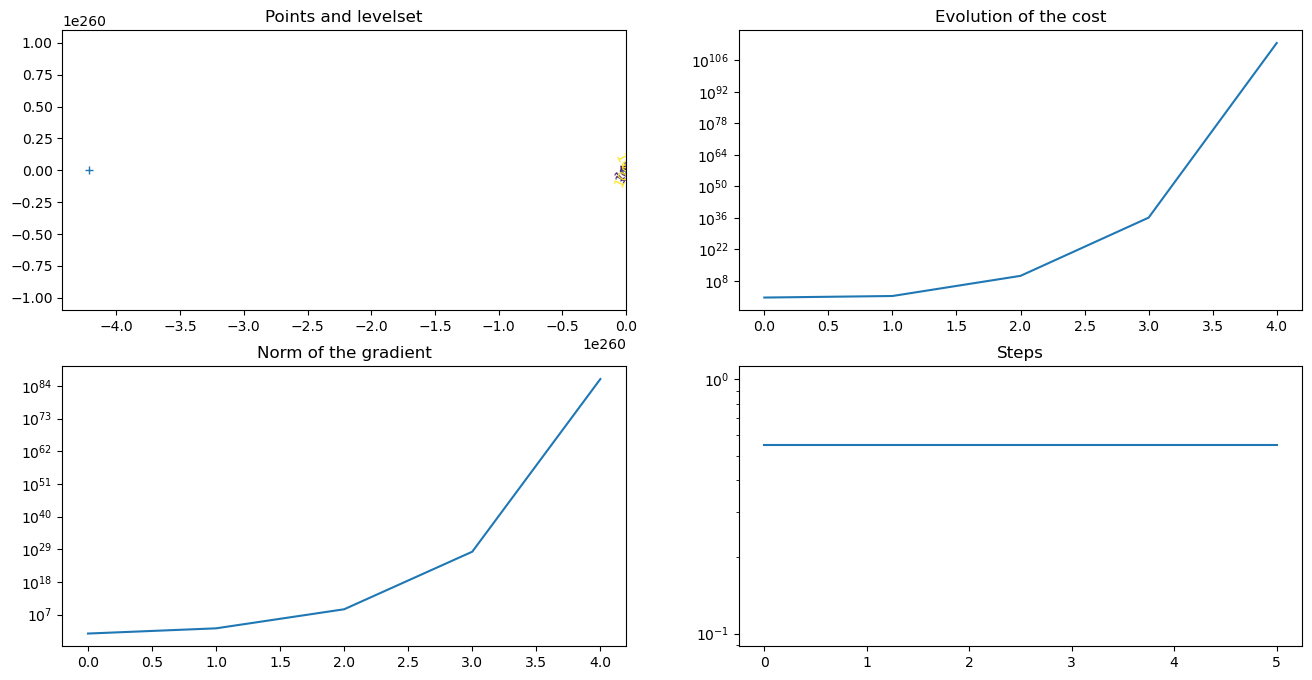

iter : 19083 cost :1.251e-08 grad :9.996e-05 comp=[38174,19083,   0]


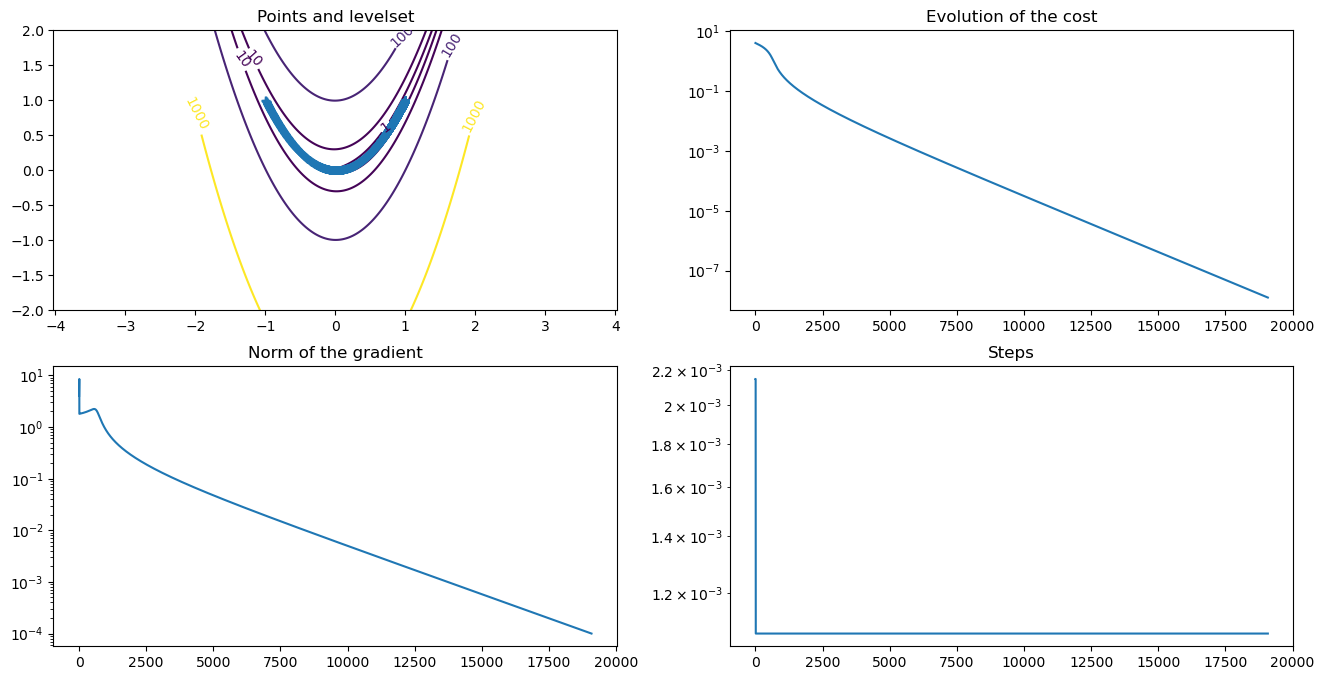

In [13]:
f=func.Rosen()
x0=np.array([-1,1])
res=opt.main_algorithm(f,0.55,x0,ls=ls_constant,dc=dc_gradient,verbose=False,itermax=40000)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f,[0,1,10,100,1000])

f=func.Rosen()
x0=np.array([-1,1])
res=opt.main_algorithm(f,0.55,x0,ls=ls_backtracking,dc=dc_gradient,verbose=False,itermax=40000)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f,[0,1,10,100,1000])

## Partial Line search

Implémenter une fonction de recherche linéaire `ls_partial_backtrack` qui commence par diviser le pas par 10 tant que la fonction ne diminue pas. Puis elle calcule le pas $s_{k+1}$ parmi 

$$\{0.1s_{k}, 0.5s_{k}, s_{k}, 2s_{k}, 10s_{k}\}$$

qui minimise $f(x_{k} + sd_{k})$.
Tester à nouveau l’algorithme de gradient et comparer la variable `nb_computations` entre cette méthode et les précédentes.

iter : 5513 cost :1.089e-08 grad :9.908e-05 comp=[39296,5513,   0]


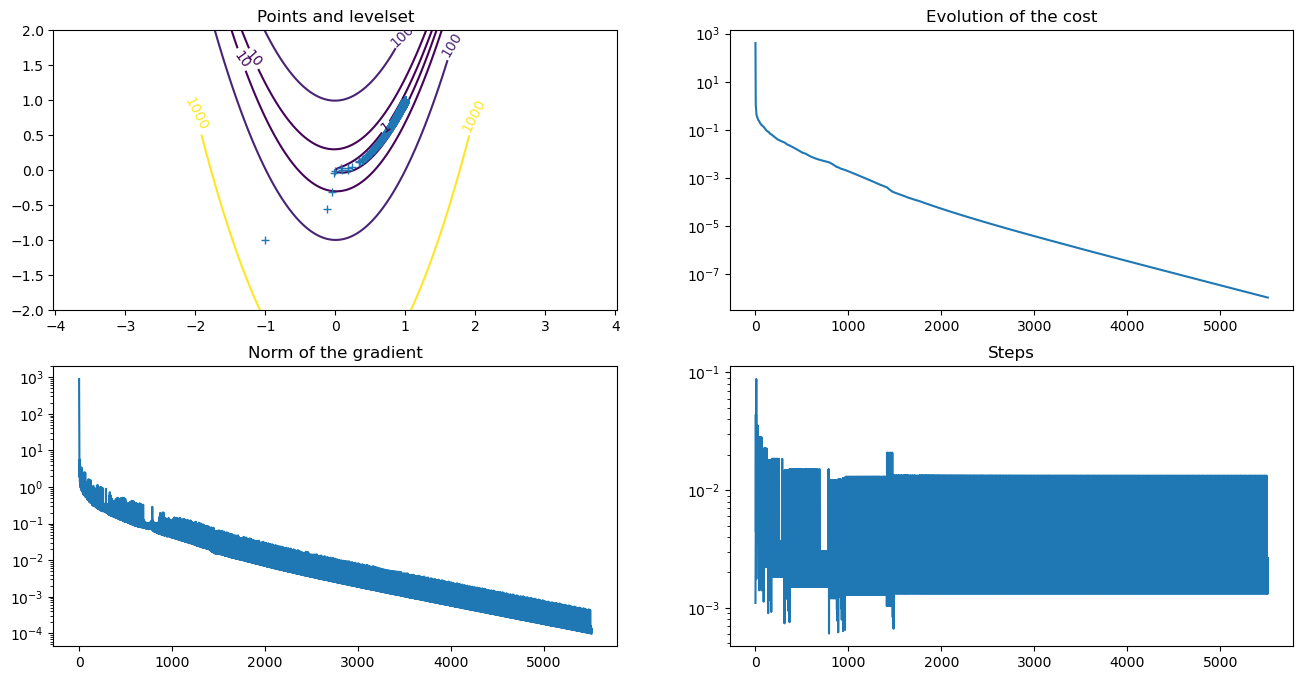

In [15]:
def ls_partial_backtrack(x,function,step,descent,f,df) :
    step2 = step
    while function.value(x + step2*descent) > f:
        step2 = step2/10
    L = [0.1,0.5,1,2,10]
    M = [function.value(x + step2*descent*0.1),function.value(x+0.5*descent*step2),function.value(x+descent*step2),function.value(x+2*descent*step2),function.value(x+10*descent*step2)]
    step2 = step2*L[M.index(min(M))]
    x2 = x + step2*descent
    f2 = function.value(x2)
    df2 = function.grad(x2)
    return x2,f2,df2,step2

f=func.Rosen()
x0=np.array([-1,-1])
res=opt.main_algorithm(f,0.55,x0,ls=ls_partial_backtrack,dc=dc_gradient,verbose=False)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f,[0,1,10,100,1000])

## Algorithme de Wolfe
On rappelle les conditions de Wolfe:

$$f(x_{k} + sd_{k}) \leq f(x_{k}) + \epsilon_{1}s(\nabla f(x_{k})^{T}d_{k})$$

$$\nabla f(x_{k} + sd_{k})^{T}d_{k} \geq \epsilon_{2}(\nabla f(x_{k})^{T}d_{k})$$

avec, en pratique: $\epsilon_{1} = 10^{−4}$ et $\epsilon_{2} = 0.9$.  
Implémenter une fonction `ls_wolfe`. Tester l’algorithme de gradient avec pas de Wolfe sur les $3$ fonctions tests proposées.

In [ ]:
def ls_wolfe(x,function,step,descent,f,df) :
    e1 = 1e-4
    e2 = 0.9
    sl = 0
    sh = np.inf
    step2 = step
    while True:
        x2 = step2*descent + x
        f2 = function.value(x2)
        if f2 > f + e1*step2*np.dot(df,descent):
            sh = step2
            step2 = (sl + sh)/2
        else:
            df2 = function.grad(x2)
            if np.dot(df2,descent) < e2*np.dot(df,descent):
                sl = step2
                if sh < np.inf:
                    step2 = (sl + sh)/2
                else:
                    step2 = 2*sl
            else:
                return x2,f2,df2,step2
    
def ls_wolfe_step_is_one(x,function,step,descent,f,df) :
    return ls_wolfe(x,function,1.,descent,f,df)

iter :  56 cost :3.949e-09 grad :8.887e-05 comp=[ 112, 112,   0]


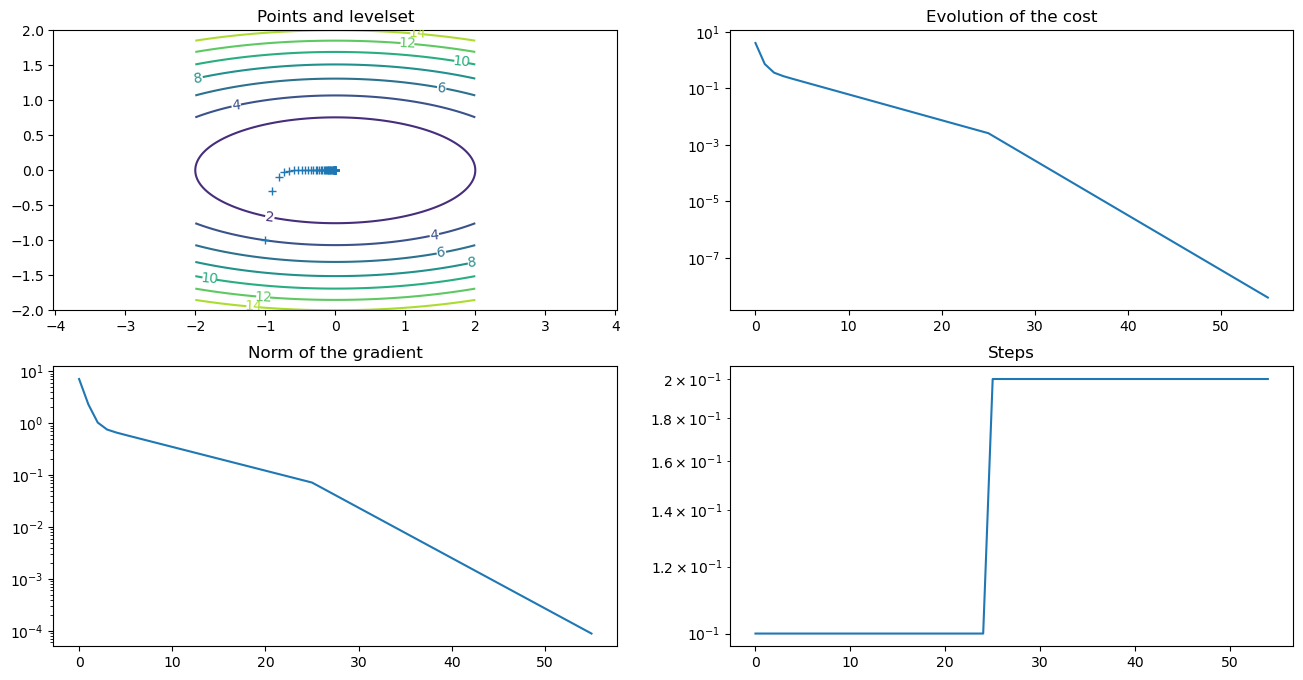

In [28]:
# TEST1 : SQUARE FUNCTION : here Wolfe is useless
f=func.square()
x0=np.array([-1,-1])
res=opt.main_algorithm(f,0.1,x0,ls=ls_wolfe,dc=dc_gradient,verbose=False)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f)

iter :  44 cost :3.827e-09 grad :8.749e-05 comp=[  96,  87,   0]


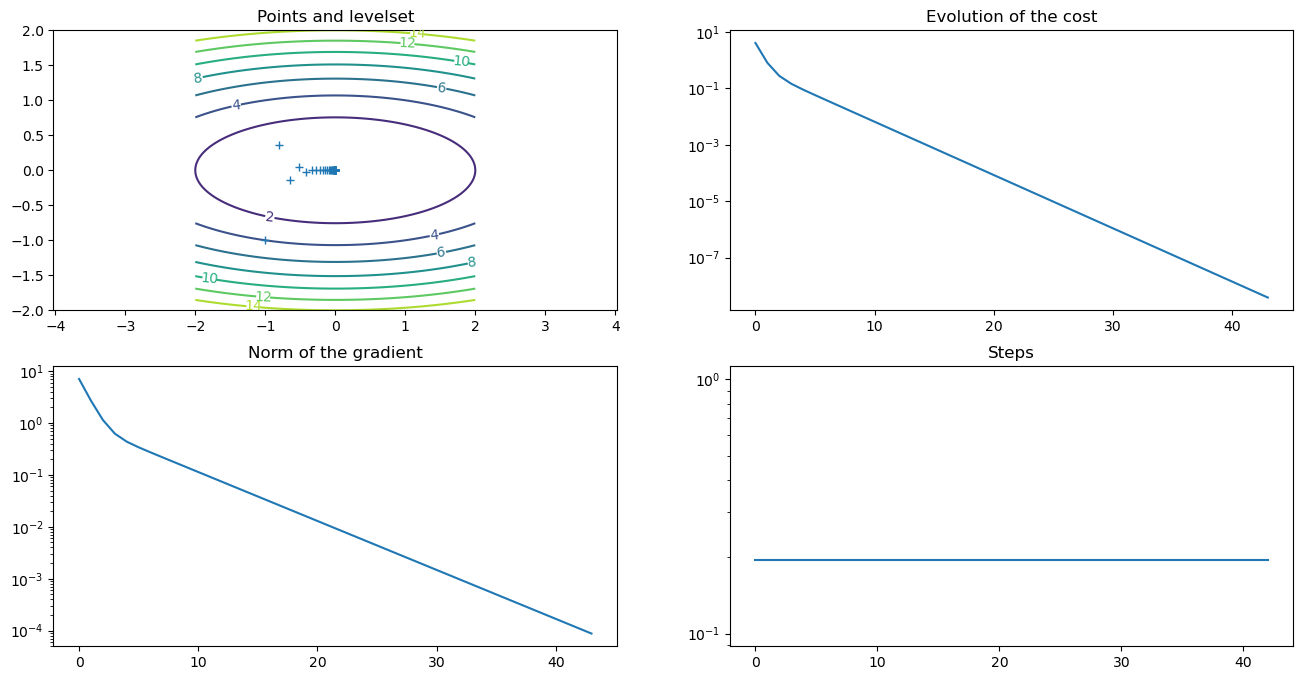

In [29]:
# TEST2 : SQUARE FUNCTION : here Wolfe is usefull but only for the first iteration
f=func.square()
x0=np.array([-1,-1])
res=opt.main_algorithm(f,100,x0,ls=ls_wolfe,dc=dc_gradient,verbose=False)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f)

iter :  48 cost :-5.000e-01 grad :8.181e-05 comp=[  96,  96,   0]


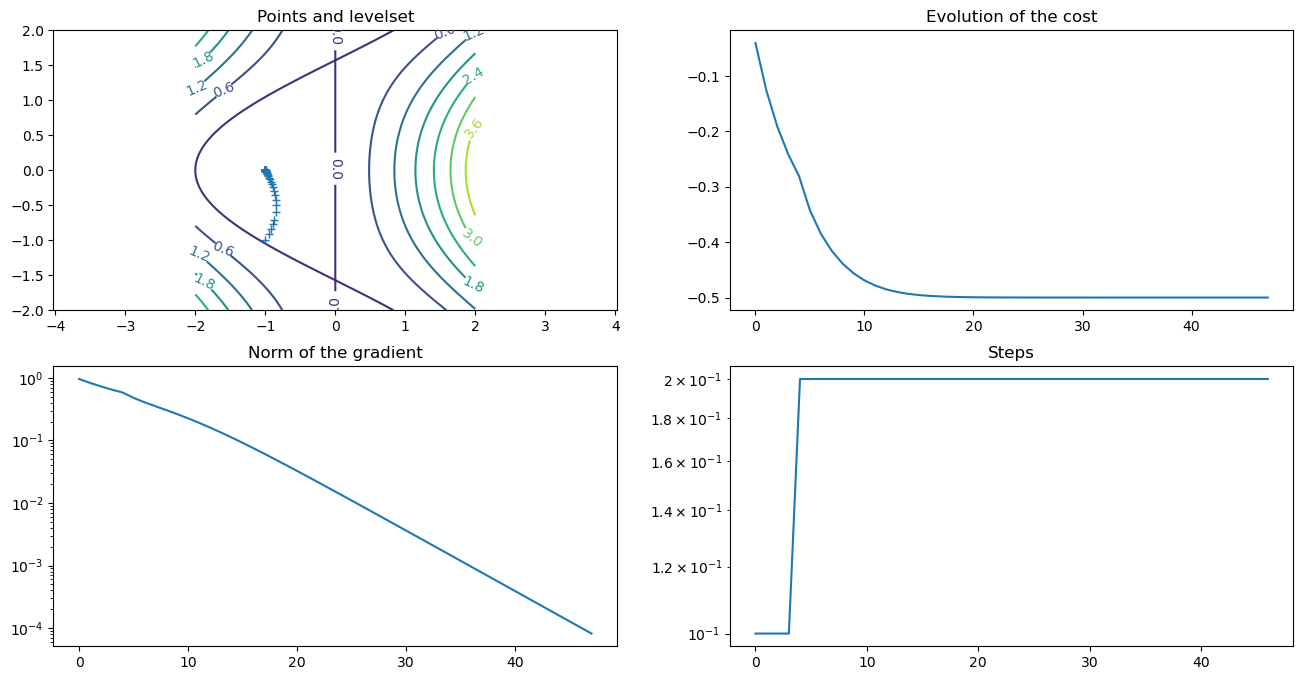

In [30]:
# TEST3 : OSCILL FUNCTION : Wolfe increases the step here
f=func.oscill()
x0=np.array([-1,-1])
res=opt.main_algorithm(f,0.1,x0,ls=ls_wolfe,dc=dc_gradient,verbose=False)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f)

iter : 8631 cost :1.132e-08 grad :9.944e-05 comp=[18330,17791,   0]


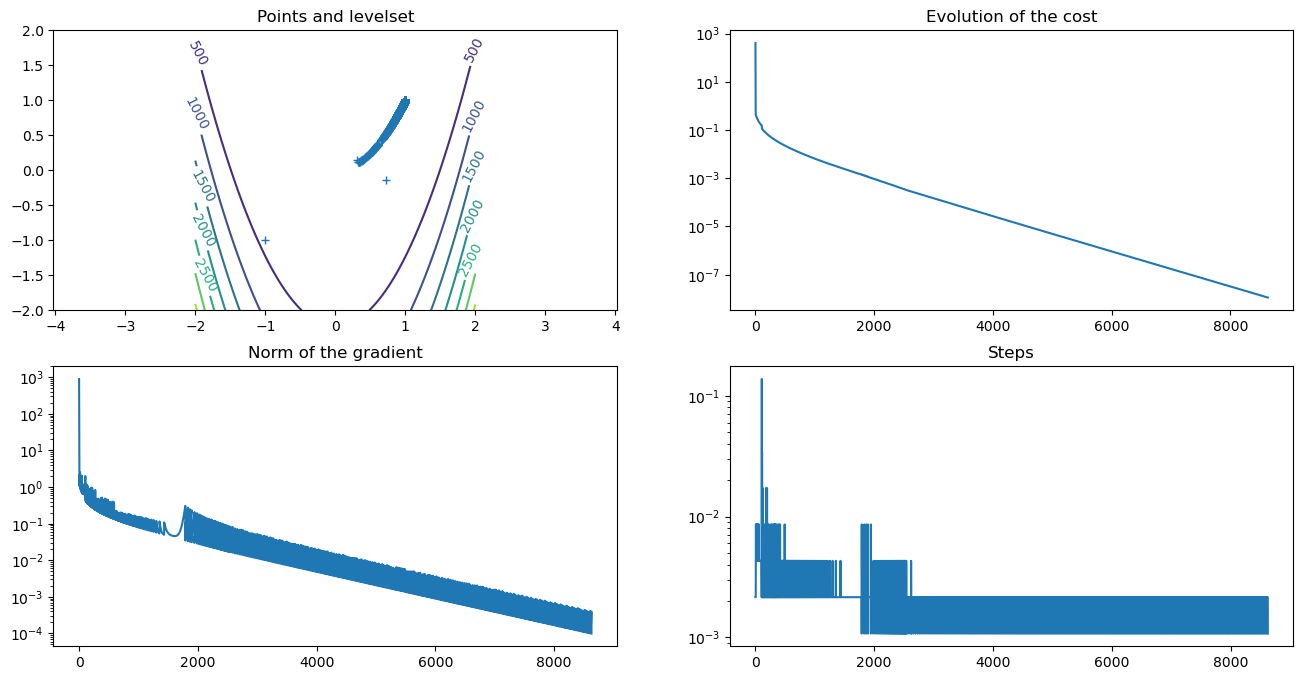

In [31]:
# TEST4 : ROSEN FUNCTION : Wolfe is kind of erratic but good
f=func.Rosen()
x0=np.array([-1,-1])
res=opt.main_algorithm(f,0.55,x0,ls=ls_wolfe,dc=dc_gradient,verbose=False)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f)

## Algorithme de Newton
Dans cette deuxième partie, nous allons implémenter les algorithmes de Newton. Il s'agit de prendre comme direction de descente $d_k$ solution de 
$$d_k=Hf(x_{k})^{−1}\nabla f(x_{k})$$
Attention ce choix de $d_k$ ne donne pas toujours une direction de descente. On va donc calculer l'angle entre $d_k$ et $\nabla f(x_{k})$, i.e, on calcule

$$\cos(\theta_k)=\frac{\langle d_k,-\nabla f(x_k)\rangle }{\Vert d_k \Vert \Vert \nabla f(x_k)\Vert}$$

Si $\cos(\theta_k)>0.1$ alors l'algorithme de Newton rend $d_k$ sinon il se transforme en algorithme de gradient et rend $-\nabla f(x_k)$.
Essayez la méthode de Newton avec pas constant. De préférence avec un pas de $1$.



In [33]:
def dc_Newton(x,function,df) :
    descent = np.matmul(np.linalg.inv(function.Hess(x)),-df)
    c = np.dot(descent,-df)/(np.linalg.norm(descent)*np.linalg.norm(df))
    if c > 0.1:
        return descent
    else:
        return -df

iter :   2 cost :0.000e+00 grad :0.000e+00 comp=[   2,   2,   1]


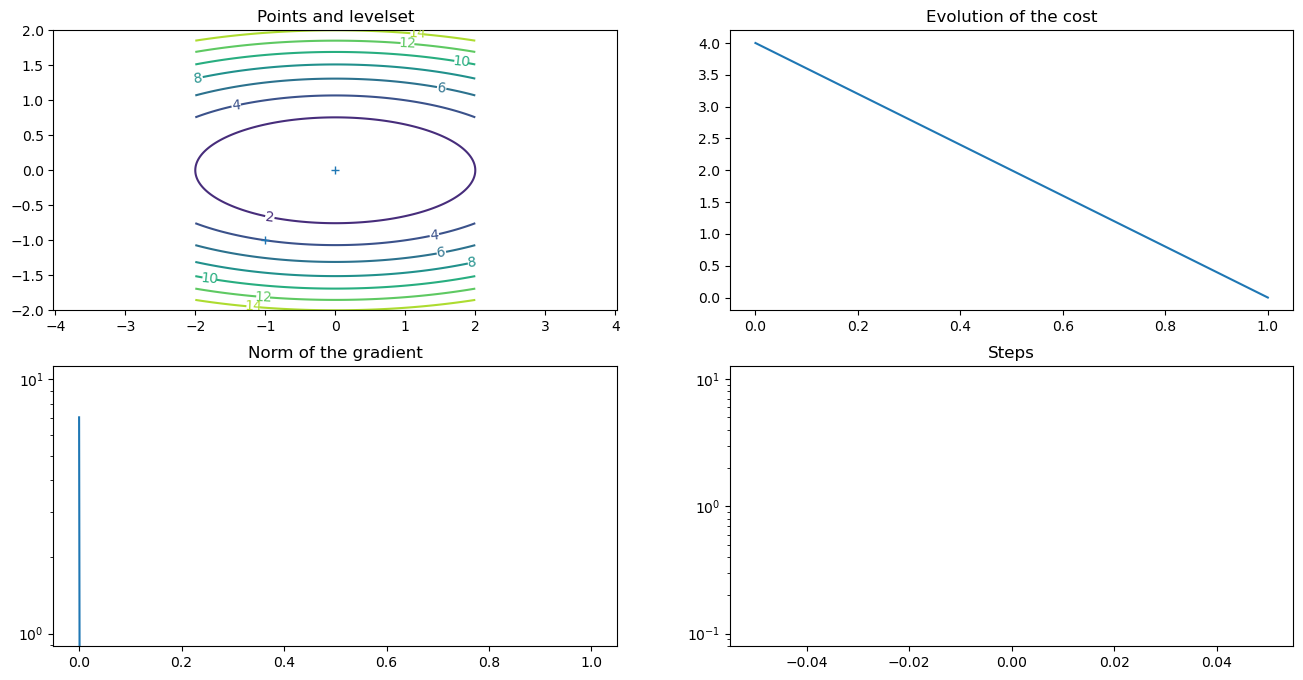

In [34]:
# TEST1 : SQUARE FUNCTION 
f=func.square()
x0=np.array([-1,-1])
res=opt.main_algorithm(f,1,x0,ls=ls_constant,dc=dc_Newton,verbose=False)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f)

iter :   5 cost :-5.000e-01 grad :2.677e-05 comp=[   5,   5,   4]


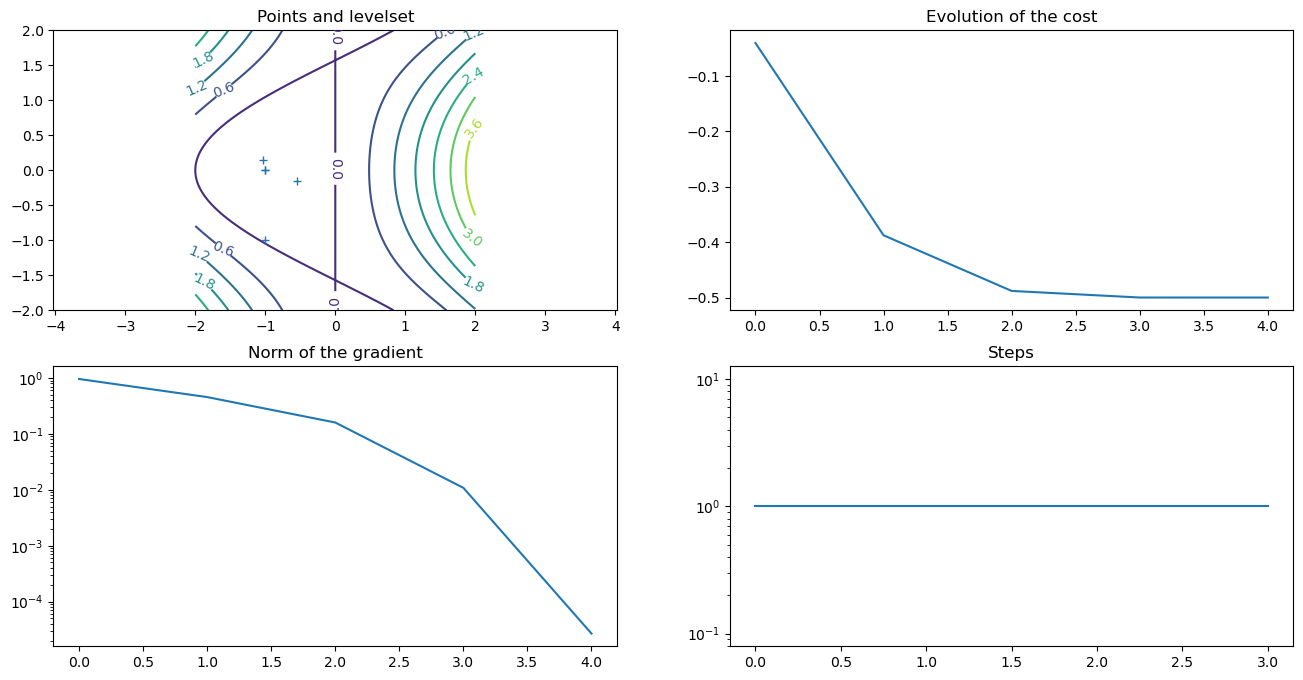

In [35]:
# TEST2 : OSCILL FUNCTION  : 
f=func.oscill()
x0=np.array([-1,-1])
res=opt.main_algorithm(f,1,x0,ls=ls_constant,dc=dc_Newton,verbose=False)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f)

iter :   6 cost :3.463e-23 grad :1.183e-11 comp=[   6,   6,   5]


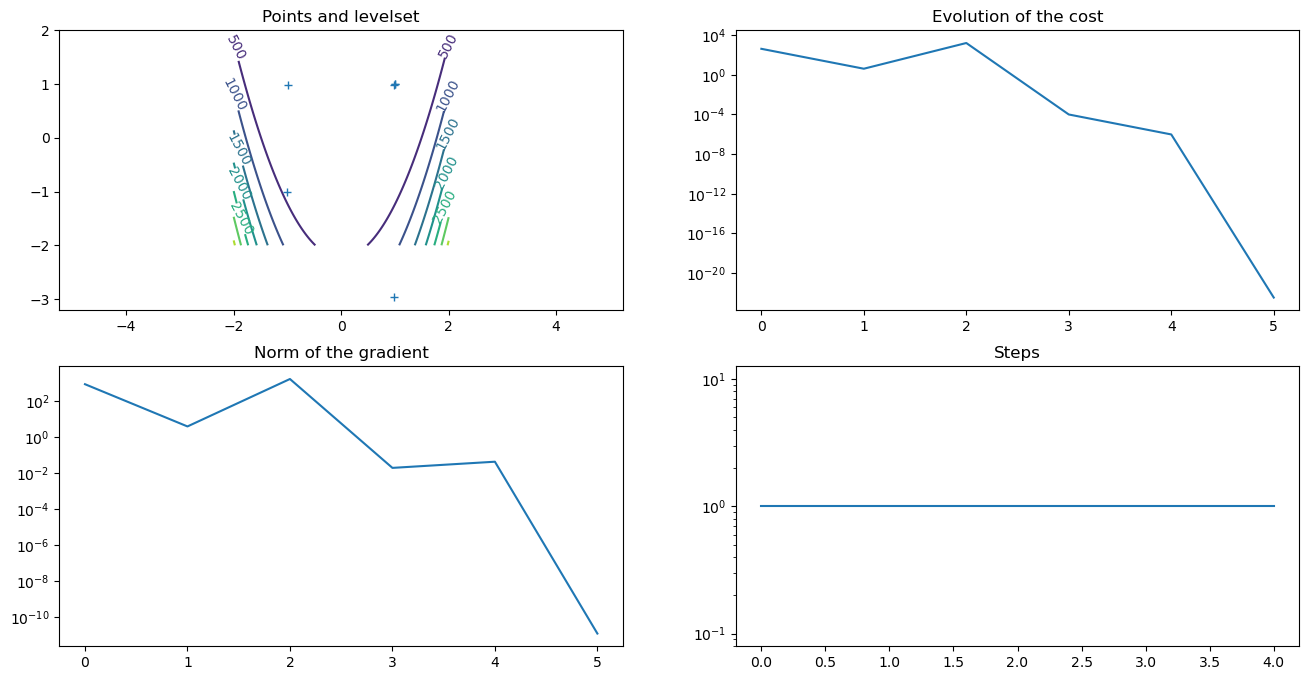

In [36]:
# TEST3 : ROSEN FUNCTION 
# convergence ultra rapide, mais on a l'impression que c'est de la chance.
f=func.Rosen()
x0=np.array([-1,-1])
res=opt.main_algorithm(f,1,x0,ls=ls_constant,dc=dc_Newton,verbose=False)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f)

Tester la méthode de Newton avec pas de Wolfe sur les 3 fonctions et comparer les résultats obtenus avec ceux des algos de gradient avec pas de Wolfe et l’algorithme de Newton classique. On essaiera aussi une nouvelle fonction linesearch qui met comme premier pas de Wolfe le pas 1. Elle est définie de la manière suivante

`def ls_wolfe_step_is_one(x,function,step,descent,f,df) :
    return ls_wolfe(x,function,1.,descent,f,df)`

/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:35: RuntimeWarning: overflow encountered in scalar multiply
  return 100*(x[1]-x[0]**2)**2 + (1 - x[0])**2
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:38: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([-400*x[0]*x[1] + 400*x[0]**3 -2 + 2*x[0], 200*x[1]-200*x[0]**2])
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:38: RuntimeWarning: overflow encountered in scalar add
  return np.array([-400*x[0]*x[1] + 400*x[0]**3 -2 + 2*x[0], 200*x[1]-200*x[0]**2])
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:43: RuntimeWarning: overflow encountered in scalar multiply
  to_return[0,0]=-400*x[1] + 1200*x[0]**2 + 2
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:44: RuntimeWarning: overflow encountered in scalar multiply
  to_return[0,1]=-400*x[0]
/home/paul-rohel/Bureau/TP OPTMI SC/functions.py:45: RuntimeWarning: overflow encountered in scalar multiply
  to_return[1,0]= -400*x[0]
/home/paul-rohel/Bureau/TP OPTMI SC

iter :   8 cost :nan grad :nan comp=[   8,   8,   7]


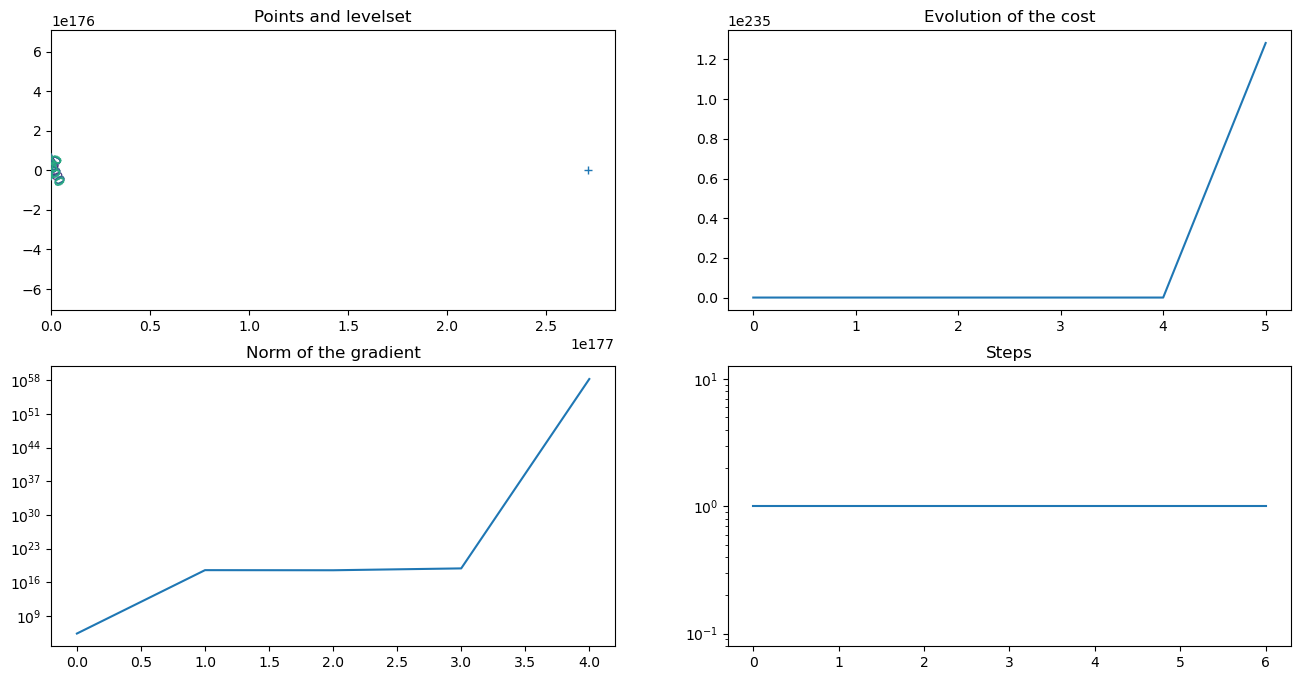

In [37]:
def ls_wolfe_step_is_one(x,function,step,descent,f,df) :
    return ls_wolfe(x,function,1.,descent,f,df)

# TEST3 : ROSEN FUNCTION 
f=func.Rosen()
x0=np.array([8,2])
res=opt.main_algorithm(f,1,x0,ls=ls_constant,dc=dc_Newton,verbose=False)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f)

iter : 249 cost :1.478e-10 grad :9.435e-05 comp=[ 716, 605, 248]


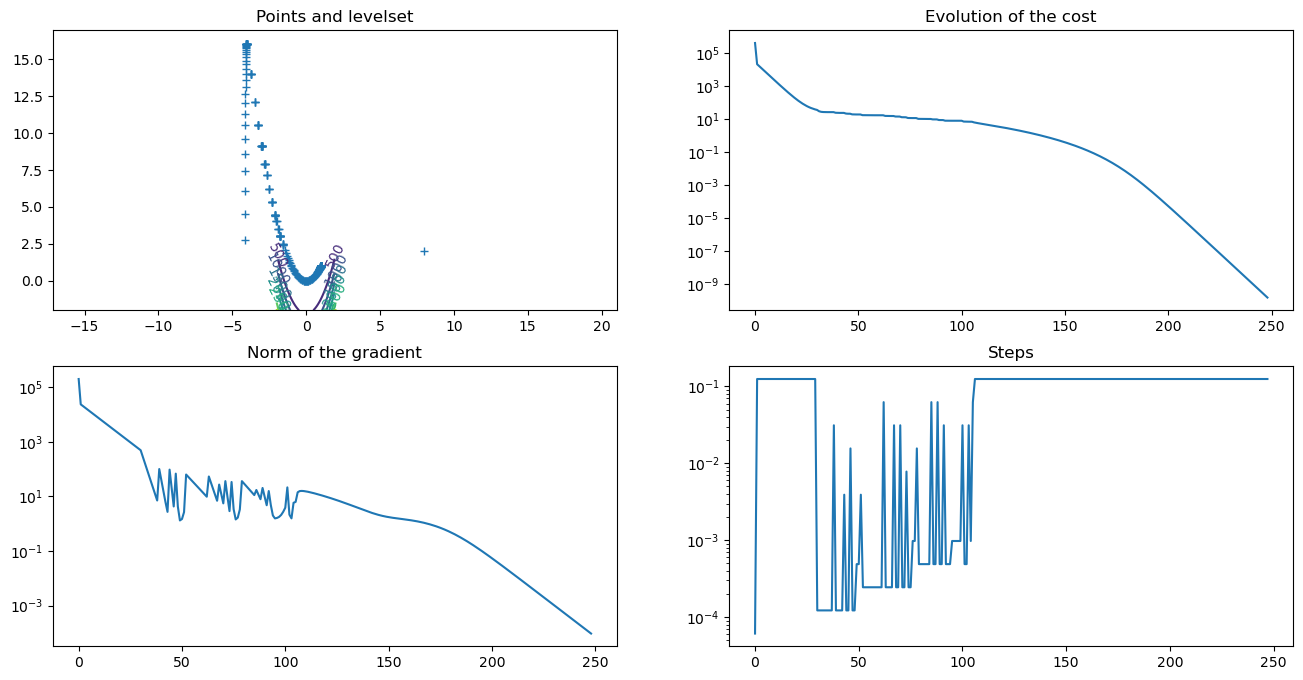

In [38]:
f=func.Rosen()
x0=np.array([8,2])
res=opt.main_algorithm(f,1,x0,ls=ls_wolfe,dc=dc_Newton,verbose=False)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f)

iter :  94 cost :2.586e-17 grad :2.235e-07 comp=[1042, 187,  93]


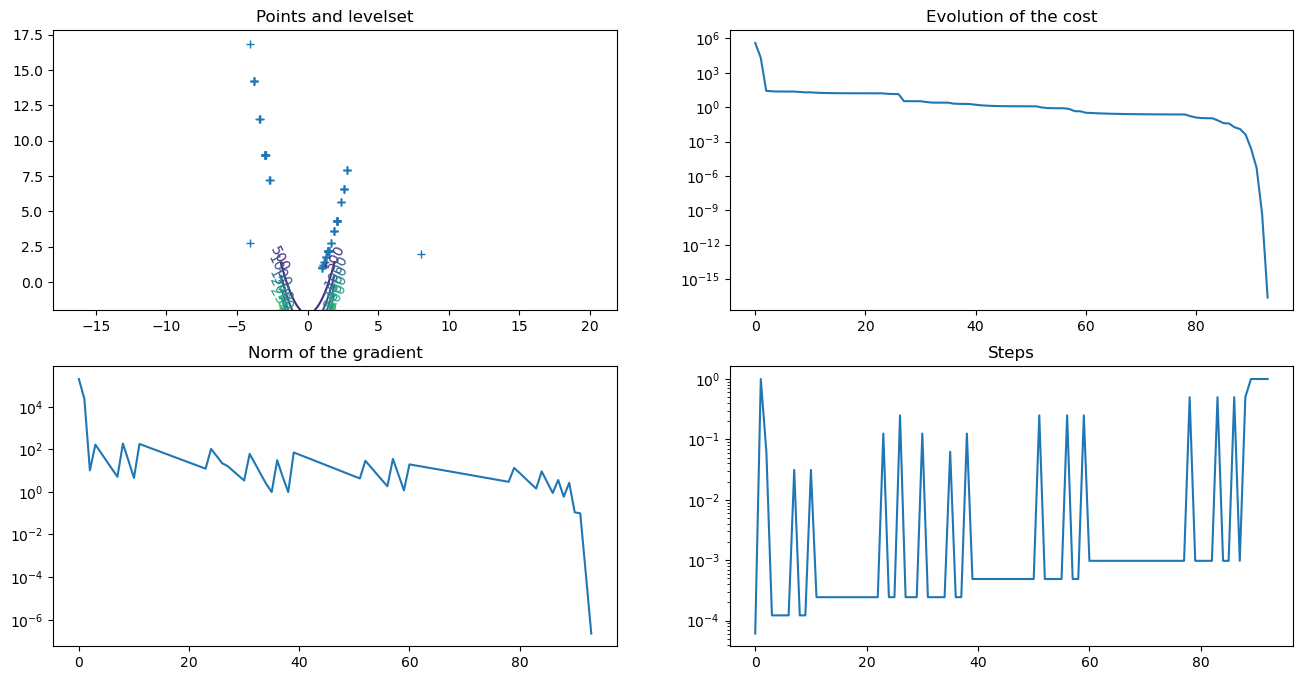

In [39]:
f=func.Rosen()
x0=np.array([8,2])
res=opt.main_algorithm(f,1,x0,ls=ls_wolfe_step_is_one,dc=dc_Newton,verbose=False)
print("iter : {:3d} cost :{:1.3e} grad :{:1.3e} comp=[{:4d},{:4d},{:4d}]"
      .format(len(res['list_costs']),res['list_costs'][-1],res['list_grads'][-1],f.nb_eval,f.nb_grad,f.nb_hess))
opt.graphical_info(res,f)